In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 22})

In [44]:
import pandas as pd
import pickle as pkl
import numpy as np

from importlib import reload
import nmtf.utils; reload(nmtf.utils)
from nmtf.utils import get_clusters
import nmtf.read; reload(nmtf.read)
from nmtf.read import _read_enrichment_results
import nmtf.enrichment; reload(nmtf.enrichment)
from nmtf.enrichment import enrichment_go, enrichment_go5
from scipy.special import binom

In [9]:
f = "/Users/veronica/Dropbox (DIBRIS)/project_UCL/BCStages-SubtypesNetworks/HER2Networks/AdaptiveLassoHER2.txt"
tb = pd.read_table(f, sep=' ')
nodes = tb.iloc[:, 0].tolist() + tb.iloc[:, 1].tolist()
genes = sorted(list(set(nodes)))

In [16]:
genes = [g.lower() for g in genes]

In [13]:
go_annotations = pd.read_table("/Users/veronica/Downloads/goa_human.gaf", sep='\t', skiprows=30, header=None)
print(go_annotations.shape)
go_annotations = go_annotations.set_index(2)
go_annotations = go_annotations[(go_annotations[6] == 'EXP') | (go_annotations[6] == 'IDA') | 
                                (go_annotations[6] == 'IPI') | (go_annotations[6] == 'IMP')]
go_annotations_bp = go_annotations[go_annotations[8]=='P']

/Users/veronica/miniconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(469828, 17)


In [18]:
go_annotations_bp.index = [str(s).lower() for s in go_annotations_bp.index]
intersection = list(set(genes).intersection(set(go_annotations_bp.index)))
subsets_annotations_go = go_annotations_bp.loc[intersection]
subsets_annotations_go.shape

(2894, 16)

In [19]:
go_level5 = pd.read_csv("/Users/veronica/Dropbox (DIBRIS)/project_UCL/data/db_GO_level5_big.csv", index_col=0)
intersection = list(set(genes).intersection(set(go_level5.index)))
subsets_annotations = go_level5.loc[intersection]

In [20]:
with open("/Users/veronica/Dropbox (DIBRIS)/project_ucl/small_results_matlab/results_HER2.pkl", "rb") as f:
    results = pkl.load(f)

In [ ]:
subsets_annotations.shape

In [45]:
bar1 = []
bar2 = []
for cl in results[3]:
    clusters_dim = []
    clusters = []
    for i in np.unique(cl):
        clusters_dim.append(np.where(cl==i)[0].shape[0])
        clusters =  np.array(genes)[np.where(cl==1)[0]]
    _, perc1, perc2 = enrichment_go5(clusters, clusters_dim, subsets_annotations)
    bar1.append(perc1)
    bar2.append(perc2)

In [46]:
bar2

[0.18823529411764706,
 0.6,
 0.0,
 0.08571428571428572,
 0.045454545454545456,
 0.2222222222222222,
 0.058823529411764705,
 0.15121951219512195,
 0.27586206896551724,
 0.09549071618037135,
 0.19083969465648856,
 0.1696969696969697]

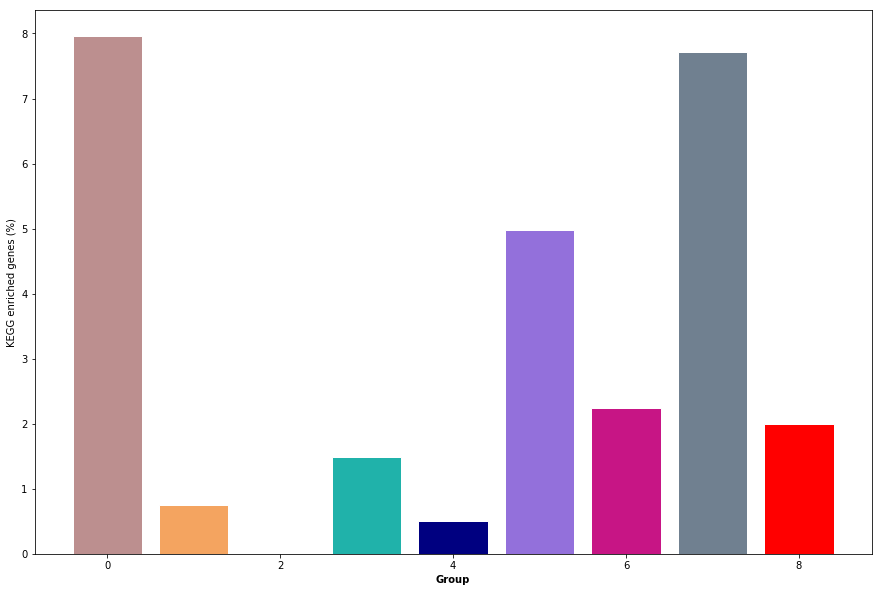

In [47]:
# set width of bar
barWidth = 0.06

plt.figure(figsize=(15,10))
colors = ['rosybrown', 'sandybrown', 'olivedrab', 'lightseagreen', 'navy', 'mediumpurple', 'mediumvioletred', 
          'slategray', 'r',]
#for i in range(9):
for i in np.arange(0,9):
    plt.bar(i, np.array(bar1[i])*100, color=colors[i], edgecolor='white')
 
plt.xlabel('Group', fontweight='bold')
#plt.xticks([r + 5*barWidth for r in range(len(bars1[0]))], groups)
plt.ylabel('KEGG enriched genes (%)')
# Create legend & Show graphic
#plt.legend()
#plt.savefig("/Users/veronica/Dropbox (DIBRIS)/project_ucl/results_enrichment_kegg_big_genes.png", dpi=300, transparent=True)
plt.show()

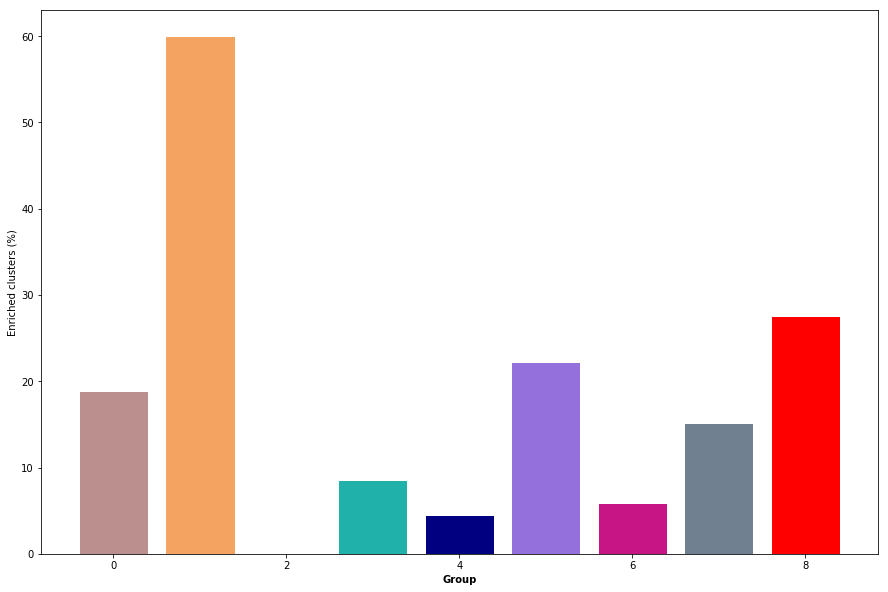

In [48]:
barWidth = 0.06

plt.figure(figsize=(15,10))
colors = ['rosybrown', 'sandybrown', 'olivedrab', 'lightseagreen', 'navy', 'mediumpurple', 'mediumvioletred', 
          'slategray', 'r',]
#for i in range(9):
for i in np.arange(0,9):
    plt.bar(i, np.array(bar2[i])*100, color=colors[i], edgecolor='white')
 
plt.xlabel('Group', fontweight='bold')
#plt.xticks([r + 5*barWidth for r in range(len(bars1[0]))], groups)
plt.ylabel('Enriched clusters (%)')
# Create legend & Show graphic
#plt.legend()
plt.savefig("/Users/veronica/Dropbox (DIBRIS)/project_ucl/results_enrichment_go_kegg_clust.png", dpi=300, transparent=True)
plt.show()